In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [3]:
np.random.seed(42)
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0
y = np.dot(X, coef)

#adding noize
y += 0.01 * np.random.normal(size=n_samples)
#splitting the data
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples //2:], y[n_samples // 2:]

In [4]:
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print('r^2 on test data: %f', r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data: %f 0.6580638417732381


In [5]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print('r^2 on test data: %ff', r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data: %ff 0.6425152496145803


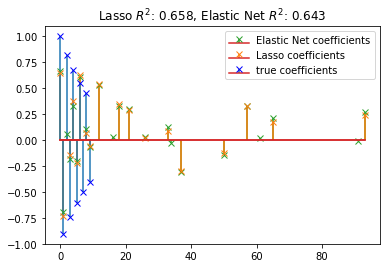

In [7]:
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ !=0], markerfmt='x',
                 label='Elastic Net coefficients', use_line_collection=True)
plt.setp([m, s], color='#2ca02c')

m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ !=0], markerfmt='x',
                 label='Lasso coefficients', use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients', markerfmt='bx',
        use_line_collection=True)

plt.legend(loc='best')
plt.title('Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f' % (r2_score_lasso, r2_score_enet))
plt.show()